<a href="https://colab.research.google.com/github/jaishruti/Influence-Maximization/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Forming graph from edge data given in a text file 
#displaying graph
#forming adjacency list 





Outgree list: {0: [1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16], 1: [0, 2, 3, 7, 12, 13, 14, 15, 17], 2: [0, 1, 3, 7, 8, 18, 12, 19, 20, 21], 3: [0, 1, 2, 7, 11, 12], 4: [0, 6, 9], 5: [0, 6, 9, 22], 6: [0, 4, 5, 22], 7: [0, 1, 2, 3], 8: [0, 2, 17, 21, 23], 18: [2, 23], 9: [0, 4, 5], 10: [0], 11: [0, 3], 12: [0, 1, 2, 3, 23], 24: [21, 23], 25: [21, 23], 22: [5, 6], 13: [0, 1], 26: [21, 23], 14: [0, 1, 23], 27: [21, 23], 15: [0, 1], 28: [21], 29: [30, 19, 31, 21, 23], 32: [30, 19, 16], 30: [29, 32, 16], 33: [31, 23], 19: [2, 29, 32, 23], 20: [2, 16, 23], 31: [29, 33, 21, 23], 17: [1, 8, 21, 23], 16: [0, 32, 30, 20, 21, 23], 21: [2, 8, 24, 25, 26, 27, 28, 29, 31, 17, 16, 23], 23: [8, 18, 12, 24, 25, 26, 14, 27, 29, 33, 19, 20, 31, 17, 16, 21]}
Ingree list: {1: [0, 2, 3, 7, 12, 13, 14, 15, 17], 2: [0, 1, 3, 7, 8, 18, 12, 19, 20, 21], 3: [0, 1, 2, 7, 11, 12], 5: [0, 6, 9, 22], 6: [0, 4, 5, 22], 7: [0, 1, 2, 3], 8: [0, 2, 17, 21, 23], 9: [0, 4, 5], 10: [0], 11: [0, 3], 12: [0, 1, 2, 3

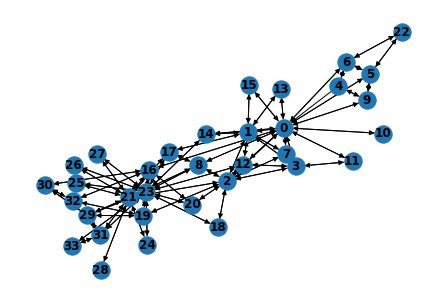

In [56]:
import networkx as nx
import re
G = nx.DiGraph()
file1 = open("/content/testcolab.txt", "r")

#opens file that holds data
f = open('/content/testcolab.txt', 'r+')
adjList={}
#this dict contains nodes(values) that follow a node(key)
IndegreeList={}
for line in f.readlines():
    # print(line)
    #removing extra spaces in between vertices
    newLine=re.sub(' +',' ',line)
     
    #extracting vertex having edge
    edgeVertex=(str(newLine)).split(" ")

    #converting to int
    vertex1=int(edgeVertex[0])
    #checking if key vertex1 not exists in dict then add it
    if vertex1 not in adjList:
      adjList[vertex1]=[]

    vertex2=int(edgeVertex[1])
    #checking if key vertex2 not exists in dict then add it
    if vertex2 not in IndegreeList:
      IndegreeList[vertex2]=[]
    #adding edge
    G.add_edge(vertex1,vertex2)

    #adding entry to adjacency list
    adjList[vertex1].append(vertex2)
    #adding the follower to IndegreeList
    IndegreeList[vertex2].append(vertex1)
f.close()

#adjacency list (dict{key:value})
print("Outgree list:",adjList)
print("Ingree list:",IndegreeList)

#prints number of graph nodes and edges
print(G)
totalNodes=G.number_of_nodes()
print("totalNodes: ",totalNodes)

#draws graph
nx.draw(G, with_labels=True, font_weight='bold')



#Finding highest out degree nodes

In [52]:
vertexWithMaxNodes=[]
numberOfOutgoingEdges=[]
for vertex in adjList:
  numberOfOutgoingEdges.append(len(adjList[vertex]))
  # numberOfOutgoingEdges[vertex]=len(adjList[vertex])
print("Outdegree of nodes 0-",totalNodes-1," :")
print(numberOfOutgoingEdges)

maxOutdegree=max(numberOfOutgoingEdges)
for i in range(totalNodes):
  if numberOfOutgoingEdges[i] == maxOutdegree:
    vertexWithMaxNodes.append(i)
    
print("Node having maximum outdegree: ",vertexWithMaxNodes)

Outdegree of nodes 0- 33  :
[15, 9, 10, 6, 3, 4, 4, 4, 5, 2, 3, 1, 2, 5, 2, 2, 2, 2, 2, 3, 2, 2, 1, 5, 3, 3, 2, 4, 3, 4, 4, 6, 12, 16]
Node having maximum outdegree:  [0, 33]


#Finding nodes with maximum followers


In [55]:
#a->b that means a is a follower and b is the person followed
vertexWithMaxFollowers=[]
numberOfIndegreeEdges=[]
#forming list of total incoming edges to a node
for vertex in IndegreeList:
  numberOfIndegreeEdges.append(len(IndegreeList[vertex]))
  # numberOfOutgoingEdges[vertex]=len(adjList[vertex])
print("Indegree of nodes 0-",totalNodes-1," :")
print(numberOfIndegreeEdges)

maxIndegree=max(numberOfIndegreeEdges)
for i in range(totalNodes):
  if numberOfIndegreeEdges[i] == maxIndegree:
    vertexWithMaxFollowers.append(i)

print("Node having maximum Indegree(Followers): ",vertexWithMaxFollowers)

Indegree of nodes 0- 33  :
[9, 10, 6, 4, 4, 4, 5, 3, 1, 2, 5, 2, 3, 2, 6, 16, 4, 2, 4, 3, 12, 2, 2, 16, 3, 4, 5, 3, 2, 2, 2, 2, 2, 1]
Node having maximum outdegree:  [15, 23]
